Предварительный анализ данных. Визуализация данных. Версия 2
=======

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

Швейцарские банкноты
-----
Файл ```swiss_bank_notes.csv``` содержит информацию о поддельных и настоящих купюрах, а именно -- о размерах банкнот. Проведем предварительный анализ и попробуем отличить фальшивые купюры от настоящих "на глаз", без применения методов машинного обучения, .

Начнём с чтения данных. Метод ```pandas.read_csv``` читает данные из текстового файла с разделителем (т.н. csv-файлы, comma-separated values) в объект DataFrame.

Полезные параметры:
* ```sep``` -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
* ```names``` -- список названий колонок, если он не задан в файле;
* ```index_col``` -- номер колонки с индексом.
* ```decimal``` -- символ-разделитель для знаков после запятой.

Пара слов об аргументах функций.
Аргументы бывают именованные (задано имя аргумента) или позиционные (имя аргумента не задано).
Здесь ```swiss_bank_notes.csv``` -- позиционный аргумент, имя файла. ```index_col=0``` -- именованный аргумент. При вызове функции именованные аргументы обязаны следовать после позиционных.

Кроме csv, pandas поддерживает чтение большинства распространённых форматов данных, в частности Excel.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#  Задаем рабочую папку
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_01/Swiss")


In [3]:
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)

Убедимся, что с самими данными всё хорошо, да и вообще данные прочитались нормально. 
Метод ```DataFrame.head``` выводит первые n строк таблицы (по умолчанию 5).

In [4]:
df

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
196,counterfeit,215.0,130.4,130.3,9.9,12.1,139.6
197,counterfeit,215.1,130.3,129.9,10.3,11.5,139.7
198,counterfeit,214.8,130.3,130.4,10.6,11.1,140.0
199,counterfeit,214.7,130.7,130.8,11.2,11.2,139.4


In [5]:
df.head(8)

#  Есть еще
#  df.tail()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8
6,genuine,215.7,130.8,130.5,9.0,10.1,141.4
7,genuine,215.5,129.5,129.7,7.9,9.6,141.6
8,genuine,214.5,129.6,129.2,7.2,10.7,141.7


Чтобы узнать размерность данных используем атрибут ```DataFrame.shape```. 
Чтобы узнать количество строк, используем функцию ```len```.

In [6]:
print(df.shape)
print(len(df))

(200, 7)
200


Посмотрим на типы данных.

In [7]:
df.dtypes

Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

Данные считались корректно.
Описательные статистики позволяют сделать их быстрый обзор. 
Метод ```DataFrame.describe``` для всех численных колонок выводит:
* count -- число значений колонок без NA-значений (NA -- not available, т.е. без пропусков),
* mean -- среднее значение колонки,
* std -- стандартное отклонение,
* min, max -- наибольшее и наименьшее значение,
* 25%, 50%, 75% -- квартили (перцентили).

In [8]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


Метод ```Series.value_counts```  выводит таблицу частот для строковой колонки ```Status``` .

In [9]:
df['Status'].value_counts()

counterfeit    100
genuine        100
Name: Status, dtype: int64

Перцентили дают неполную картину распределения данных. Метод ```Series.hist``` строит гистограмму. 
Для этого нужно предварительно импортировать библиотеки ```matplotlib``` и ```matplotlib.pyplot```.

In [10]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

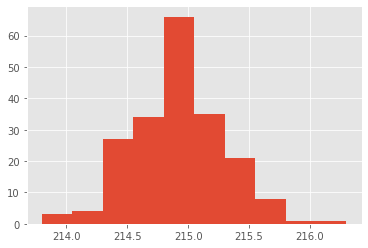

In [11]:
# Гистограмма для переменной Length.
df['Length'].hist();

Нормированный вариант гистограммы.
Поскольку основания столбцов одной длины, отличие только на вертикальной оси

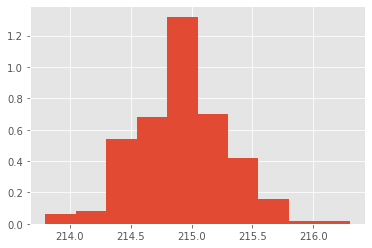

In [12]:
df['Length'].hist(density = True)

Две гистограммы на одном графике. Для классов ```counterfeit``` и ```genuine```. 
В этом случае можно не нормировать, так как объемы классов одинаковы.
На гистограмме ищем разницу в распределении фальшивых и подлинных банкнот.

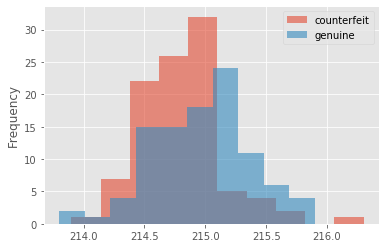

In [13]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
df.groupby('Status')['Length'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();



Разницы в распределении между фальшивыми и подлинными купюрами практически нет. Но это мы построили распределения только одной переменной. Можно построить гистограммы и для остальных факторов. Но если колонок не очень много (как в нашем случае), можно построить матрицу диаграмм рассеивания, которая показывает все распределениями сразу.

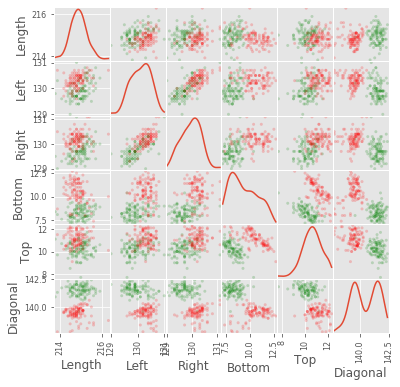

In [14]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # оценка плотности вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              );

Самое сильное смещение двух нормальных распределений в распределении диагоналей купюр. Теперь построим гистограммы этой переменной для двух классов купюр.

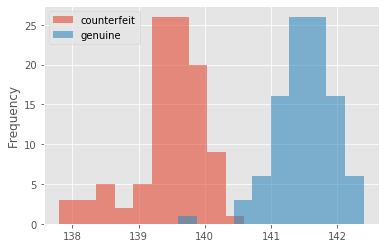

In [15]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

Может быть интересной диаграмма рассеивания, например, для пары признаков ```Top``` и ```Bottom```.

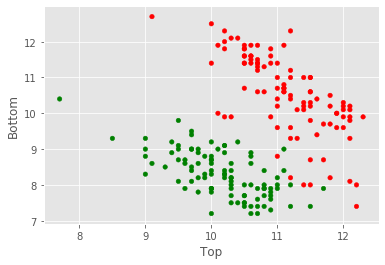

In [19]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))

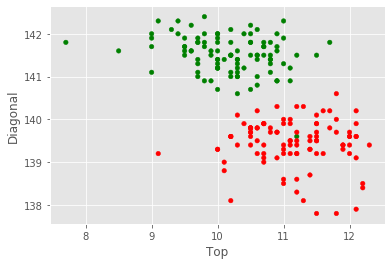

In [20]:
df.plot.scatter(x='Top', y='Diagonal', c=df['Status'].replace(colors))

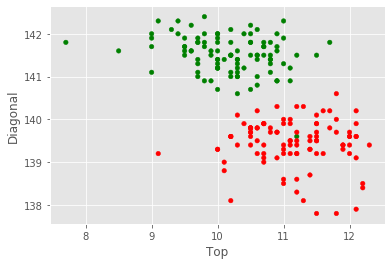

In [21]:
df.plot.scatter(x='Top', y='Diagonal', c=df['Status'].replace(colors))